In [13]:
import pandas as pd
import warnings
import os
import concurrent.futures


warnings.filterwarnings('ignore')
df = pd.read_csv('data_live_engineer_filtered.csv', encoding='utf-8')


In [17]:
df.columns

Index(['minute', 'homeTeam', 'awayTeam', 'goal_home', 'goal_away',
       'shots_home', 'shots_away', 'blockedShots_home', 'blockedShots_away',
       'league', 'corners_home', 'corners_away', 'redcards_home',
       'redcards_away', 'shotsOffgoal_home', 'shotsOffgoal_away',
       'shotsOngoal_home', 'shotsOngoal_away', 'yellowcards_home',
       'yellowcards_away', 'fouls_home', 'fouls_away', 'offsides_home',
       'offsides_away', 'tackles_home', 'tackles_away', 'result', 'match_id',
       'possessiontime_away', 'possessiontime_home', 'f_attack_home',
       'f_defensive_away', 'f_defensive_home', 'f_attack_away',
       'win_rate_home', 'loss_rate_home', 'draw_rate_home', 'win_rate_away',
       'loss_rate_away', 'draw_rate_away', 'shotAccuracy_home',
       'shotAccuracy_away', 'attackPressureOverTime_home',
       'attackPressureOverTime_away', 'aggrressionOverTime_home',
       'aggresssionOverTime_away', 'defensiveEfficacy_home',
       'defensiveEfficacy_away', 'taklesOverTi

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
label_encoders = {}
for column in ['homeTeam', 'awayTeam', 'league']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the df into features and target variable
X = df.drop(['result', 'match_id'], axis=1)
y = df['result']

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:
X.columns

Index(['minute', 'homeTeam', 'awayTeam', 'goal_home', 'goal_away',
       'shots_home', 'shots_away', 'blockedShots_home', 'blockedShots_away',
       'league', 'corners_home', 'corners_away', 'redcards_home',
       'redcards_away', 'shotsOffgoal_home', 'shotsOffgoal_away',
       'shotsOngoal_home', 'shotsOngoal_away', 'yellowcards_home',
       'yellowcards_away', 'fouls_home', 'fouls_away', 'offsides_home',
       'offsides_away', 'tackles_home', 'tackles_away', 'possessiontime_away',
       'possessiontime_home', 'f_attack_home', 'f_defensive_away',
       'f_defensive_home', 'f_attack_away', 'win_rate_home', 'loss_rate_home',
       'draw_rate_home', 'win_rate_away', 'loss_rate_away', 'draw_rate_away',
       'shotAccuracy_home', 'shotAccuracy_away', 'attackPressureOverTime_home',
       'attackPressureOverTime_away', 'aggrressionOverTime_home',
       'aggresssionOverTime_away', 'defensiveEfficacy_home',
       'defensiveEfficacy_away', 'taklesOverTime_home', 'taklesOverTime_awa

In [22]:
report

'              precision    recall  f1-score   support\n\n           0       0.88      0.77      0.83      2696\n           1       0.80      0.90      0.85      2681\n\n    accuracy                           0.84      5377\n   macro avg       0.84      0.84      0.84      5377\nweighted avg       0.84      0.84      0.84      5377\n'

In [24]:
import joblib

# Save the label encoders, scaler, and model
joblib.dump(label_encoders, '../models/label_encoders.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(model, '../models/random_forest_model.pkl')

['../models/random_forest_model.pkl']

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle

# Implementar o agente de Q-learning
class QLearningAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros((state_size, action_size))
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.01
        self.memory = []

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        return np.argmax(self.q_table[state])

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = np.random.choice(len(self.memory), batch_size, replace=False)
        for index in minibatch:
            state, action, reward, next_state, done = self.memory[index]
            target = reward if done else reward + self.gamma * np.max(self.q_table[next_state])
            self.q_table[state][action] += self.learning_rate * (target - self.q_table[state][action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay




In [3]:
# Função para preparar dados
def prepare_data(df):
    # X = df[['minute','shots_home', 'shots_away', 'league',
    #         'corners_home', 'corners_away', 'shotsOffgoal_home',
    #         'shotsOffgoal_away', 'fouls_home', 'fouls_away', 'tackles_home',
    #         'tackles_away', 'possessiontime_away',
    #         'possessiontime_home', 'f_attack_home', 'f_defensive_away',
    #         'f_defensive_home', 'f_attack_away', 'win_rate_home', 'loss_rate_home',
    #         'draw_rate_home', 'win_rate_away', 'loss_rate_away', 'draw_rate_away',
    #         'shotAccuracy_home', 'shotAccuracy_away', 'attackPressureOverTime_home',
    #         'attackPressureOverTime_away', 'aggrressionOverTime_home',
    #         'aggresssionOverTime_away', 'defensiveEfficacy_home', 'taklesOverTime_home', 'taklesOverTime_away',
    #         'possessionControl', 'passRisk_home', 'passRisk_away', '05ht_home',
    #         '05ht_away']]
    X = df.drop(columns=['result', 'homeTeam', 'awayTeam', 'match_id'])
    y = df['result']
    return X, y

# Função para criar e aplicar o transformador de colunas
def create_preprocessor(X):
    numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()
    categorical_features = ['league']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])
    return preprocessor.fit(X)

# Função para simular apostas ao vivo com os novos parâmetros
def simulate_live_betting(agent, X_test, y_test):
    total_money = 0
    betting_stats = []
    for i in range(len(X_test)):
        state = prepare_state(X_test[i])
        action = agent.act(state)
        if action == 1:  # Fez uma aposta
            reward = 100 if y_test.iloc[i] == 1 else -100
            total_money += reward
        else:
            reward = 0
        next_state = prepare_state(X_test[(i + 1) % len(X_test)])
        agent.remember(state, action, reward, next_state, reward != 0)
        agent.replay(batch_size)
        betting_stats.append((X_test[i], action, reward))
    return total_money, betting_stats


# Função para preparar estado
def prepare_state(data_row):
    return int(data_row.sum()) % state_size


In [4]:
df.columns

Index(['minute', 'homeTeam', 'awayTeam', 'shots_home', 'shots_away', 'league',
       'corners_home', 'corners_away', 'shotsOffgoal_home',
       'shotsOffgoal_away', 'shotsOngoal_home', 'fouls_home', 'fouls_away',
       'tackles_home', 'tackles_away', 'result', 'match_id',
       'possessiontime_away', 'possessiontime_home', 'f_attack_home',
       'f_defensive_away', 'f_defensive_home', 'f_attack_away',
       'win_rate_home', 'loss_rate_home', 'draw_rate_home', 'win_rate_away',
       'loss_rate_away', 'draw_rate_away', 'shotAccuracy_home',
       'shotAccuracy_away', 'attackPressureOverTime_home',
       'attackPressureOverTime_away', 'aggrressionOverTime_home',
       'aggresssionOverTime_away', 'defensiveEfficacy_home',
       'defensiveEfficacy_away', 'taklesOverTime_home', 'taklesOverTime_away',
       'possessionControl', 'passRisk_home', 'passRisk_away', '05ht_home',
       '05ft_home', '05_home', '05ht_away', '05ft_away', '05_away'],
      dtype='object')

In [5]:
# Preparar e dividir os dados
X, y = prepare_data(df)
preprocessor = create_preprocessor(X)
pickle.dump(preprocessor, open('../models/preprocessor.pickle', 'wb'))
X_transformed = preprocessor.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=42)

In [6]:
# Fixar semente de aleatoriedade para reprodutibilidade
np.random.seed(42)

In [7]:
X.columns

Index(['minute', 'shots_home', 'shots_away', 'league', 'corners_home',
       'corners_away', 'shotsOffgoal_home', 'shotsOffgoal_away',
       'shotsOngoal_home', 'fouls_home', 'fouls_away', 'tackles_home',
       'tackles_away', 'possessiontime_away', 'possessiontime_home',
       'f_attack_home', 'f_defensive_away', 'f_defensive_home',
       'f_attack_away', 'win_rate_home', 'loss_rate_home', 'draw_rate_home',
       'win_rate_away', 'loss_rate_away', 'draw_rate_away',
       'shotAccuracy_home', 'shotAccuracy_away', 'attackPressureOverTime_home',
       'attackPressureOverTime_away', 'aggrressionOverTime_home',
       'aggresssionOverTime_away', 'defensiveEfficacy_home',
       'defensiveEfficacy_away', 'taklesOverTime_home', 'taklesOverTime_away',
       'possessionControl', 'passRisk_home', 'passRisk_away', '05ht_home',
       '05ft_home', '05_home', '05ht_away', '05ft_away', '05_away'],
      dtype='object')

In [8]:
# Inicializar variáveis para monitorar o melhor agente
best_total_money = -np.inf
best_agent = None

# Inicializar o agente
state_size = 20  # Aumentar o número de estados
action_size = 2  # Apostas: 0 = não apostar, 1 = apostar

# Treinar o agente com novos parâmetros
episodes = 500  # Aumentar o número de episódios
batch_size = 64  # Aumentar o tamanho do lote

agent = QLearningAgent(state_size, action_size)

# Carregar agente salvo se existir
if os.path.exists('../models/best_q_learning_agent.pkl'):
    print('Carregando agente com melhor lucro...')
    with open('../models/best_q_learning_agent.pkl', 'rb') as f:
        best_agent = pickle.load(f)
    best_total_money = simulate_live_betting(best_agent, X_test, y_test)[0]
    print('Carregado agente com melhor lucro:', best_total_money)
    print()

Carregando agente com melhor lucro...
Carregado agente com melhor lucro: 500



In [25]:
for i in range(10):
    print(f'Iteração {i + 1}')

    # Função para treinar e avaliar um agente
    def train_and_evaluate_agent(_):
        print(f'Training agent... {_ + 1}')
        agent = QLearningAgent(state_size, action_size)
        for e in range(episodes):
            for i in range(len(X_train)):
                state = prepare_state(X_train[i])
                action = agent.act(state)
                next_state = prepare_state(X_train[(i + 1) % len(X_train)])
                reward = y_train.iloc[i] if action == 1 else 0
                done = True if reward == 1 else False
                agent.remember(state, action, reward, next_state, done)
                agent.replay(batch_size)
                if done:
                    break
        
        total_money, _ = simulate_live_betting(agent, X_test, y_test)
        print('agent total_money:', total_money )
        print('total_money:', total_money)
        
        return total_money, agent

    # Treinar o agente e salvar o melhor usando processamento paralelo
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(train_and_evaluate_agent, range(16)))

    for total_money, agent in results:
        if total_money > best_total_money:
            best_total_money = total_money
            best_agent = agent
            # Salvar o melhor agente
            with open('../models/best_q_learning_agent.pkl', 'wb') as f:
                pickle.dump(best_agent, f)

    print('best_total_money:', best_total_money)
    print()


Iteração 1
Training agent... 1
Training agent... 2
Training agent... 3
Training agent... 4
Training agent... 5
Training agent... 6
Training agent... 7
Training agent... 8
Training agent... 9
Training agent... 10
Training agent... 11
Training agent... 12
Training agent... 13
Training agent... 14
Training agent... 15
Training agent... 16
agent total_money: -100
total_money: -100
agent total_money: -900
total_money: -900
agent total_money: -3500
total_money: -3500
agent total_money: 3700
total_money: 3700
agent total_money: 700
total_money: 700
agent total_money: -7900
total_money: -7900
agent total_money: 6000
total_money: 6000
agent total_money: -1000
total_money: -1000
agent total_money: -400
total_money: -400
agent total_money: 5000
total_money: 5000
agent total_money: -400
total_money: -400
agent total_money: -3900
total_money: -3900
agent total_money: -6200
total_money: -6200
agent total_money: 1500
total_money: 1500
agent total_money: 700
total_money: 700
agent total_money: -7000
t

Melhor Lucro Total: 4800


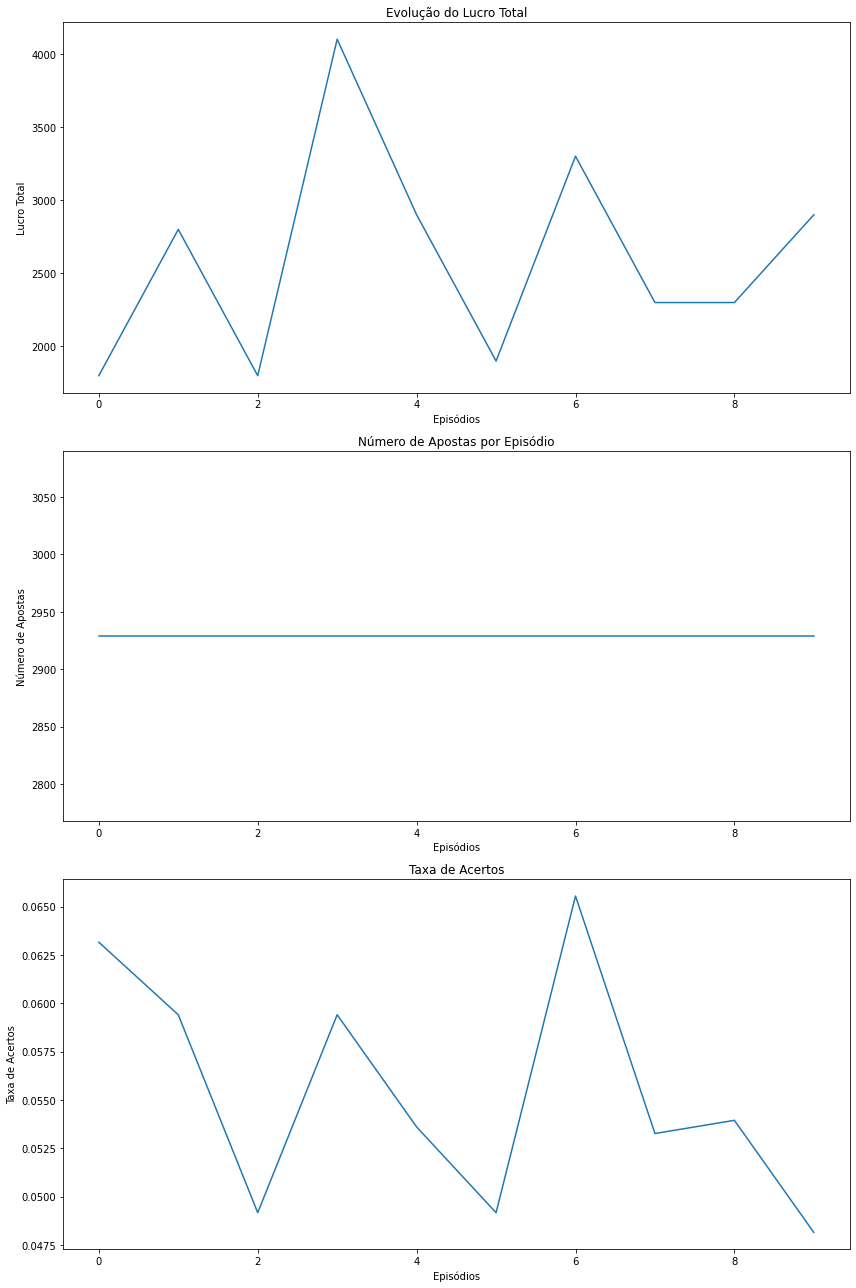

In [12]:
# import matplotlib.pyplot as plt

# # Função para visualizar os resultados
# def plot_results(total_money_history, bet_count_history, accuracy_history):
#     fig, axs = plt.subplots(3, 1, figsize=(12, 18))

#     axs[0].plot(total_money_history)
#     axs[0].set_title('Evolução do Lucro Total')
#     axs[0].set_xlabel('Episódios')
#     axs[0].set_ylabel('Lucro Total')

#     axs[1].plot(bet_count_history)
#     axs[1].set_title('Número de Apostas por Episódio')
#     axs[1].set_xlabel('Episódios')
#     axs[1].set_ylabel('Número de Apostas')

#     axs[2].plot(accuracy_history)
#     axs[2].set_title('Taxa de Acertos')
#     axs[2].set_xlabel('Episódios')
#     axs[2].set_ylabel('Taxa de Acertos')

#     plt.tight_layout()
#     plt.show()

# # Função para calcular a taxa de acertos
# def calculate_accuracy(betting_stats):
#     total_bets = len(betting_stats)
#     correct_bets = sum(1 for _, _, reward in betting_stats if reward == 100)
#     return correct_bets / total_bets if total_bets > 0 else 0

# # Listas para armazenar histórico dos resultados
# total_money_history = []
# bet_count_history = []
# accuracy_history = []

# # Simular apostas ao vivo com o melhor agente e armazenar os resultados
# for episode in range(10):
#     total_money, betting_stats = simulate_live_betting(best_agent, X_test, y_test)
#     total_money_history.append(total_money)
#     bet_count_history.append(len(betting_stats))
#     accuracy_history.append(calculate_accuracy(betting_stats))

# # Exibir os resultados
# print('Melhor Lucro Total:', best_total_money)
# plot_results(total_money_history, bet_count_history, accuracy_history)
